# PCA

Principal Component Analysis

## Introdução

PCA (Principal Component Analysis) é um algoritmo de redução de dimensionalidade que tem como objetivo principal acelerar o treinamento de modelos, simplificando os dados sem perder informações significativas. A ideia é reduzir a dimensionalidade do dataset, preservando ao máximo variância dos dados.  

Além de melhorar a eficiência computacional, o PCA também é uma ferramenta poderosa para visualização de dados. Ao reduzir o número de dimensões para 2 ou 3, é possível representar de forma condensada conjuntos de dados de alta dimensionalidade, permitindo uma visão mais clara e intuitiva das relações entre os dados. Muitas vezes, essa visualização ajuda a identificar padrões, como os clusters.  

Esse algoritmo é particularmente útil quando se trabalha com grandes volumes de dados e muitas variáveis e quando as variáveis têm grande correlação entre si, pois ajuda a reduzir o tempo de execução dos modelos, mantendo a maior parte da variabilidade dos dados.  

No entanto, é crucial lembrar que a redução de dimensionalidade deve ser usada com cautela. Antes de aplicá-la, recomenda-se sempre que possível treinar os modelos utilizando os dados originais, pois, ao reduzir a dimensionalidade, costuma haver perda de informações (não necessariamente, mas em geral, sim). Esse comprometimento *pode* impactar negativamente o desempenho de alguns modelos.  

Pode-se dizer que o PCA é literalmente a quebra ou dobra das dimensoes existentes em menos dimensões que captem bem a variância de todas as dimensões originais (lê-se variaveis quando me refiro a dimensão).

### Pré Requisitos

- É importante que se normalize (StandardScaler) os dados antes de aplicar o PCA;
- Faça um pré processamento dos dados (removendo ou preechendo NaN, por exemplo);
- Transformar variáveis categóricas em numéricas (One Hot Encoding ou Label Enconding - de preferência o primeiro);
- Remover colunas claramente sper correlacionadas.

### Taxa de Variância

É possível também checar a taxa de variância explicada em nossos componentes a partir do atributo _explained_variance_ratio__ (ex: pca.explained_variance_ratio_)

### Escolhendo o Número Adequado de Dimensões

A escolha do número de dimensões deve ser definida pela quantidade (%) de variância que deve ser mantida (que seja suficientemente grande, a ponto que não se perca muita informação - por exemplo, 95%), a não ser que o objetivo seja visualizar os dados - nesse caso, é necessário reduzir para 2 ou 3.  
Com o código abaixo é possivel calcular o número mínimo de dimensoes necessárias para preservar 95% da variância do conjunto:  

In [1]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
# X_reduced = pca.fit_transform(X_train)

Outra opção seria plotar a variância explicada como uma função do número de dimensões (plotando um cumsum). Em geral, haverá uma cruva em forma de cotovelo (da mesma maneira quando precisamos selecionar o numero de cluster em Kmeans) em que a variância explicada rapidamente para de crescer. Nesse Caso, voce pode observar em que dimensãoo modelo passa a perder muita variância! Exemplo abaixo:  

C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Número de dimensoes no dataset original: 4


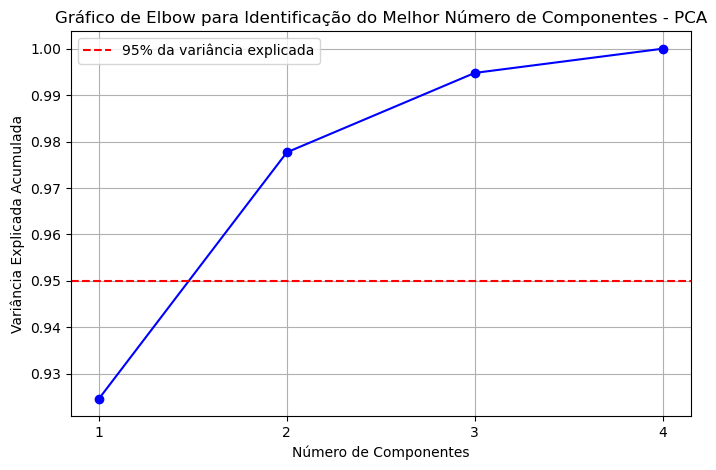

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris  # Exemplo com o dataset Iris

# Carregando dados 
X, _ = load_iris(return_X_y=True)
print(f'Número de dimensoes no dataset original: {X.shape[1]}')
# Aplicar PCA sem limitar o número de componentes
pca = PCA()
pca.fit(X)

# Variância explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # soma acumulada -> array([0.92461872, 0.97768521, 0.99478782, 1.00])

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Gráfico de Elbow para Identificação do Melhor Número de Componentes - PCA')
plt.grid()


# Definindo a escala do eixo X de 1 em 1
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 1)) # ticks de 1 a 5, de 1 em 1

# Adicionar uma linha horizontal para ver onde a variância explicada atinge 90%
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância explicada')
plt.legend()

plt.show()

> Nesso caso, caso eu quisesse manter pelo menos 95% da variância dos meus dados, poderia reduzir no máximo a 2 componentes (de 4 iniciais pra 2) 

Irei usar a seguir o dataset MNIST para aplicar os aprendizados de PCA.

## Hands On

### Sobre o dataset

Este dataset consiste em uma coleção de imagens de dígitos manuscritos (0 a 9), coletadas de diversos escritores.  

Quantidade: O dataset contém 70.000 imagens:  

Dimensão das imagens: Cada imagem é de 28x28 pixels (784 características/colunas), representando cada dígito como uma matriz de intensidades de pixel.  

Objetivo: O principal objetivo é reduzir a dimensionalidade deste dataset sem perder a clareza das imagens.  

Características:

Cada imagem é uma matriz 28x28 de pixels, com valores entre 0 e 255 (onde 0 representa branco e 255 representa preto).  
As imagens são rotuladas, ou seja, para cada imagem, o rótulo corresponde ao dígito que ela representa. (mnist['target']).

In [3]:
from sklearn.datasets import fetch_openml

# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784')

# As imagens de dígitos são armazenadas em mnist.data e o valor dos digitos (rotulos) em mnist.target
X, y = mnist["data"], mnist["target"].astype(int).to_numpy() # os labels vem como string do fetch_openml, portanto ja irei transformar em números (e tambpem em numpy array pois vou precisar usar com index mais a frente)

# Mostrar as dimensões do dataset
print(X.shape)  # 70000 amostras, 784 features (28x28 pixels)
print(y.shape)  # 70000 rótulos


(70000, 784)
(70000,)


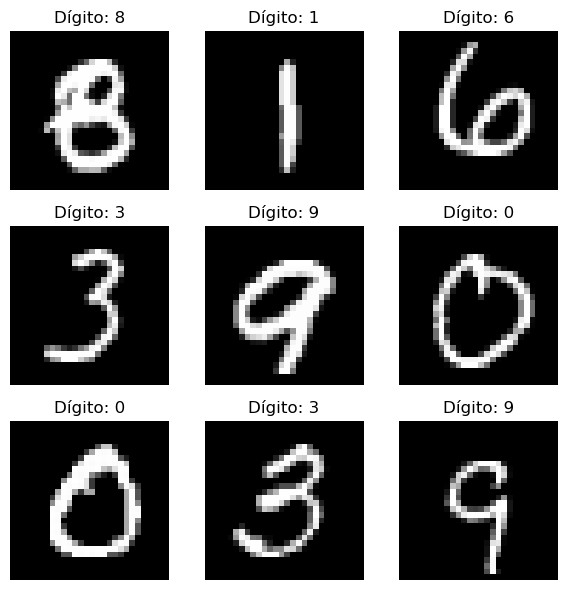

In [4]:
# Selecionar 9 imagens aleatórias para Visualização
indices = np.random.choice(len(X), 9, replace=False)  # Selecionar 9 índices aleatórios
images = X.iloc[indices].to_numpy().reshape(9, 28, 28)  # Redimensionar para 9 imagens de 28x28
labels = y[indices]  # Obter os rótulos correspondentes

# Criar um grid 3x3 para exibir as imagens
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

# Iterar sobre as imagens e eixos para exibir cada uma
for i, ax in enumerate(axes.flat): # axes.flat transforma a matriz 3x3 (do subplot) em um array 1D (ou seja: [ax00, ax01, ax02, ax10, ax11, ax12, ax20, ax21, ax22])
# com o enumerate acabo trazendo i, ax -> indice, eixo (ex: 0, ax00)
    ax.imshow(images[i], cmap='gray')  # Mostrar a imagem -> exibe a imagem (funcao imshow) do indice i
    ax.set_title(f"Dígito: {labels[i]}")  # Exibir o rótulo
    ax.axis("off")  # Remover os eixos

# Ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()


### Aplicando a Redução de Dimensionalidade

irei primeiro aplicar o "método de Elbow" para verificar a % de variância conforme o número de dimensões

shape: (24500, 784)


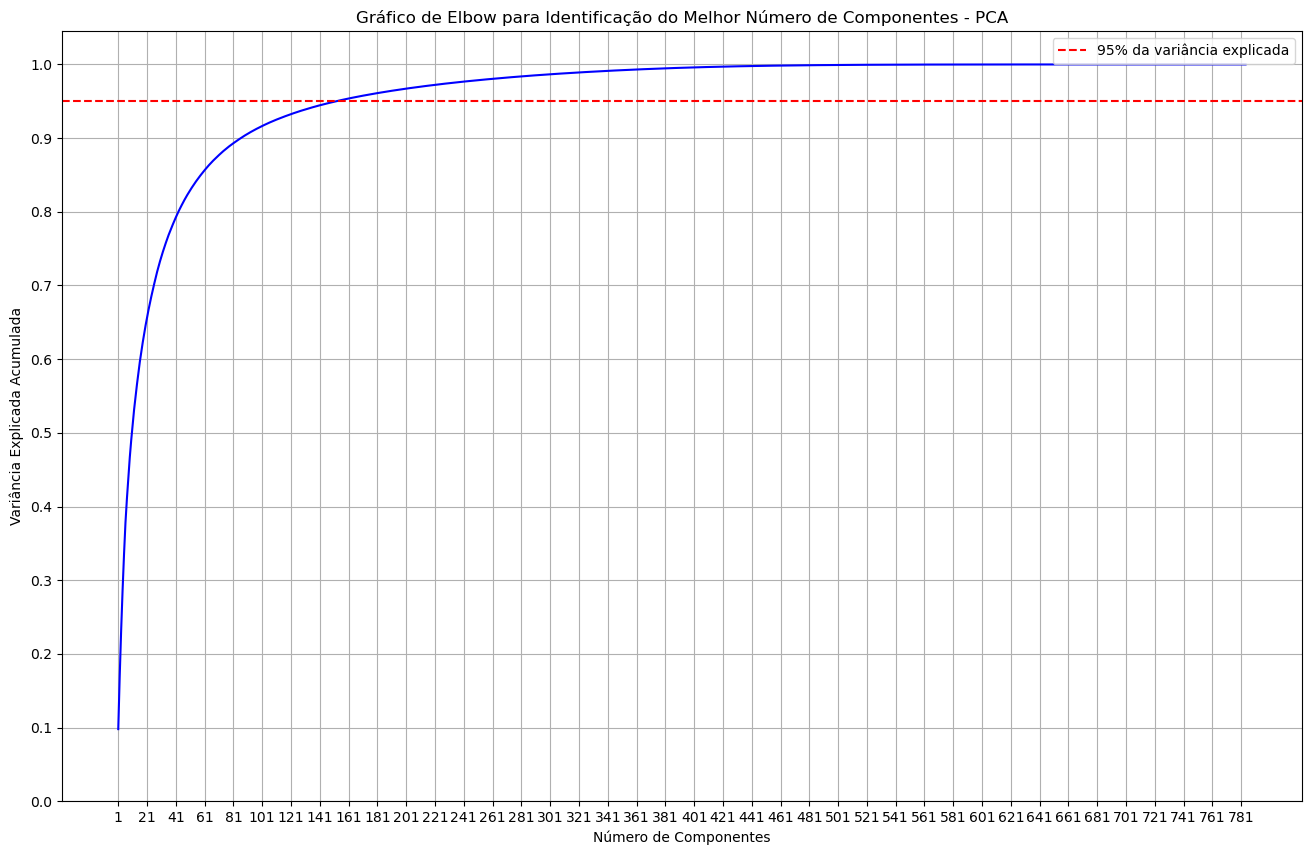

In [5]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_sample = X.sample(frac = 0.35)
print(f'shape: {X_sample.shape}')
# não usarei todos os dados pois é muito grande o dataset (70000)
pca.fit(X_sample)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(16,10))
plt.plot(range(1,len(cumulative_variance) + 1, 1),  cumulative_variance,  linestyle = '-', color = 'b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Gráfico de Elbow para Identificação do Melhor Número de Componentes - PCA')
plt.grid()

# Definindo a escala do eixo X de 1 em 1
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 20))
plt.yticks(np.arange(0, 1.1, 0.10))
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância explicada')
plt.legend()

plt.show()
# checar agora certinho a quantidade de 



In [6]:
# manteve-se 95% de variancia entre 161 e 150 mais ou menos. Irei checar
lst = [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]
for i in lst:
    print(f'cumulative sum for dimension {i}: {round(np.cumsum(pca.explained_variance_ratio_)[i],4)}') ### -> está errado

cumulative sum for dimension 150: 0.9494
cumulative sum for dimension 151: 0.9499
cumulative sum for dimension 152: 0.9504
cumulative sum for dimension 153: 0.9508
cumulative sum for dimension 154: 0.9512
cumulative sum for dimension 155: 0.9517
cumulative sum for dimension 156: 0.9521
cumulative sum for dimension 157: 0.9525
cumulative sum for dimension 158: 0.953
cumulative sum for dimension 159: 0.9534
cumulative sum for dimension 160: 0.9538
cumulative sum for dimension 161: 0.9542
cumulative sum for dimension 162: 0.9546
cumulative sum for dimension 163: 0.955
cumulative sum for dimension 164: 0.9554


>O número mínimo de dimensões com pelo menos 95% foram 152 componentes. Portanto, irei fazer a redução para 152 dimensões

In [7]:
pca = PCA(n_components=152)
X_sample = X.sample(frac = 0.35, random_state = 19)
y_sample = y[X_sample.index.to_numpy()] # irei usar para label do meu plot de imagens -> nomo y não esta como pandas Serie, nao pude usar o iloc[X_sample.index]. Apenas indexeis os valores do X_sample
print(f'shape: {X_sample.shape}')
# não usarei todos os dados pois é muito grande o dataset (70000)
X_reduced = pca.fit_transform(X_sample)

shape: (24500, 784)


In [8]:
# 152 dimensões
X_reduced.shape

(24500, 152)

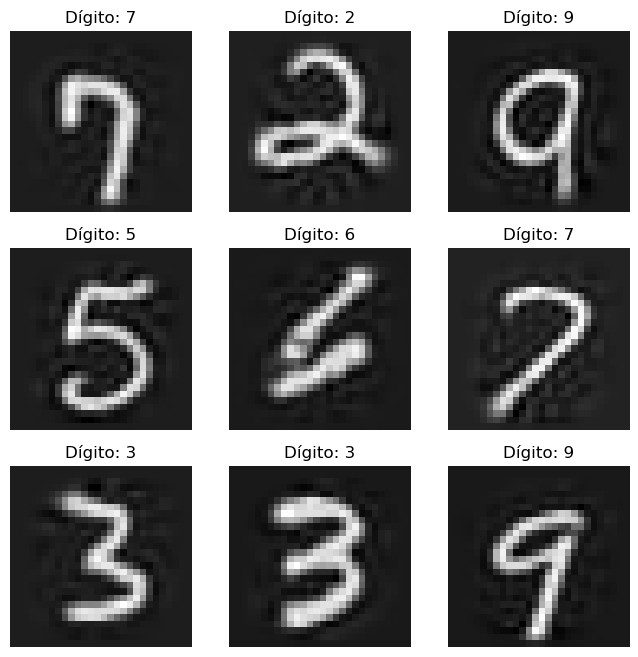

In [9]:
# Para visualizar a imagem após a reducao, preciso fazer a inversao de volta para ver a imagem


X_reconstructed = pca.inverse_transform(X_reduced)  # Voltar para dimensão original
indices = np.random.choice(len(X_reconstructed), 9, replace=False) 
images = X_reconstructed[indices].reshape(9, 28, 28)  # Reformar para 28x28 (formato imagem)
labels = y_sample[indices]  # Obter os rótulos correspondentes


# Plotando as imagens reconstruídas
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f"Dígito: {labels[i]}")  # Exibir o rótulo
    ax.axis("off")

plt.show()


> É possível verificar que a foto perdeu sim um pouco de qualidade ao reduzir a dimensionalidade, porém continua sendo bem claro qual número cada imagem representa.

### Tempo de Execução 

Irei aplicar aos datasets com dimensionalidade reduzida e original um classificador Random Forest para fazer uma comparação de tempo de execucao quando o dataset tem 152 x 784 variáveis. 


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time
# Lembrando que estamos usando apenas um sample de 35% do dataset.

modelo_original = RandomForestClassifier()
modelo_reduzido = RandomForestClassifier()

scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_sample_scaled = scaler.fit_transform(X_sample)

# Tempo do primeiro modelo
start_time = time.time()
modelo_original.fit(X_sample_scaled, y_sample)

end_time = time.time()
execution_time = end_time - start_time # calculando tempo de execucao
print(f'Tempo de execução do modelo sem redução de dimensionalidade(784 colunas): {execution_time:.4f} segundos')


# Tempo do segundo modelo
start_time = time.time()
modelo_reduzido.fit(X_reduced_scaled, y_sample)

end_time = time.time()
execution_time = end_time - start_time # calculando tempo de execucao
print(f'Tempo de execução do modelo com redução de dimensionalidade(152 colunas): {execution_time:.4f} segundos')

Tempo de execução do modelo sem redução de dimensionalidade(784 colunas): 12.2114 segundos
Tempo de execução do modelo com redução de dimensionalidade(152 colunas): 37.1957 segundos


In [13]:
print(f'shape do dataset original: {X_sample_scaled.shape}')
print(f'shape do dataset reduzido: {X_reduced_scaled.shape}')

shape do dataset original: (24500, 784)
shape do dataset reduzido: (24500, 152)


> Por algum motivo que ainda não sei identificar, o modelo com a redução de dimensão teve um resultado inferior